In [29]:
# ========================================
# 1. IMPORT LIBRARIES
# ========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:


# ========================================
# 2. LOAD DATASET
# ========================================
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Lihat 5 baris pertama
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
# ========================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ========================================

# Bentuk dataset
print("Shape:", df.shape)

# Informasi dataset
print("\nInfo:")
print(df.info())

# Statistik ringkas
df.describe()


Shape: (20640, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Cek missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


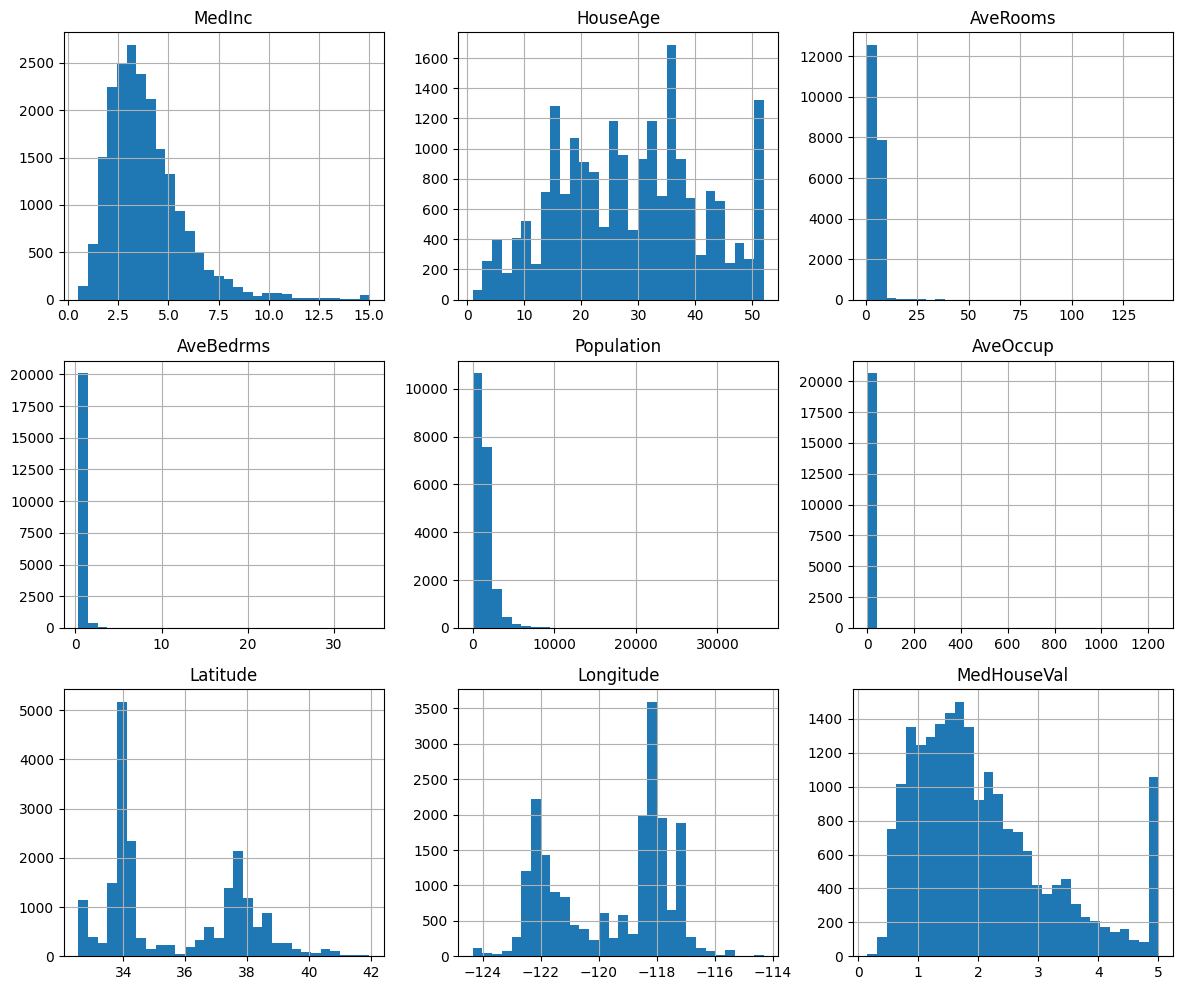

In [7]:
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

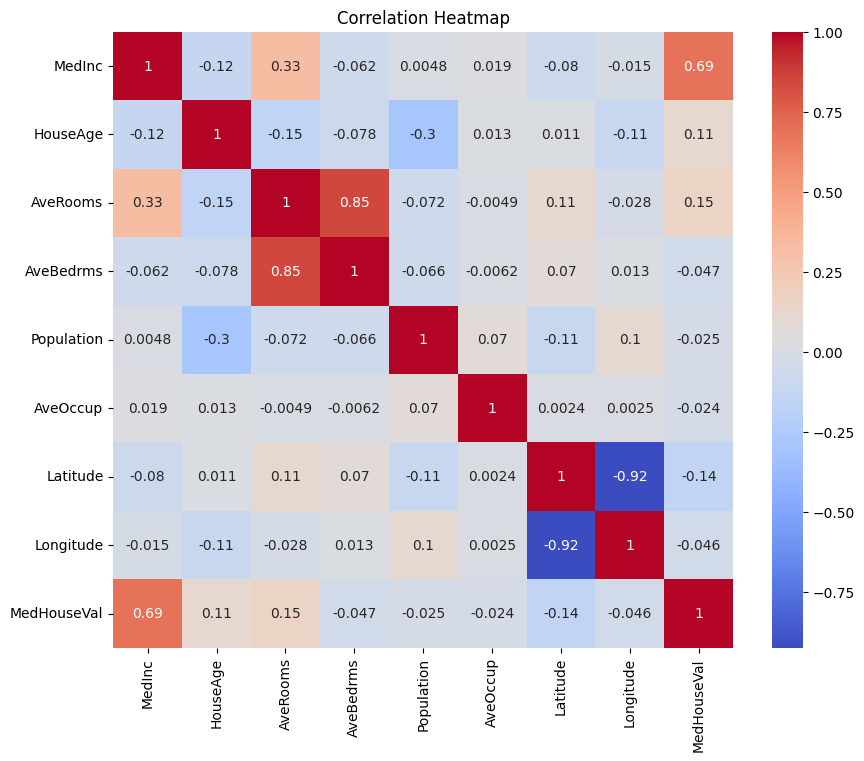

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

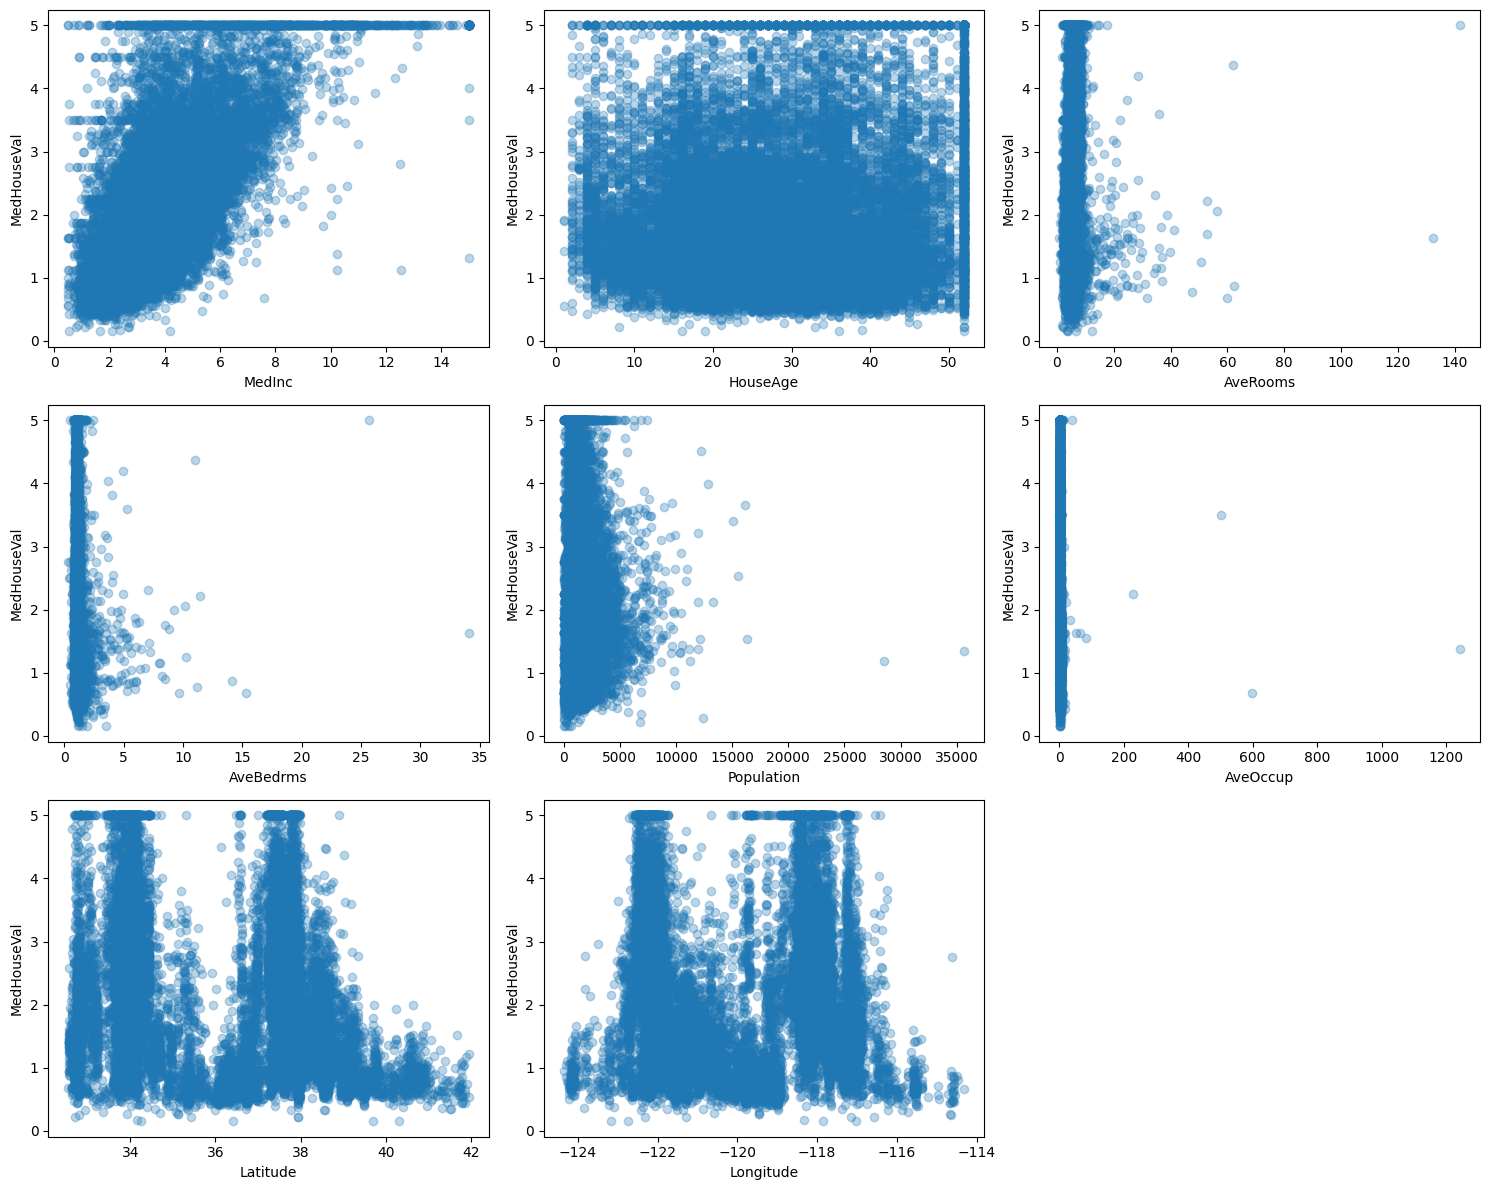

In [15]:
features = df.columns.tolist()
features.remove("MedHouseVal")

plt.figure(figsize=(15, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.scatter(df[col], df["MedHouseVal"], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel("MedHouseVal")
plt.tight_layout()
plt.show()

In [18]:
# ========================================
# 4. PREPROCESSING
# ========================================

# Pisahkan fitur & target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# ========================================
# Scaling (StandardScaler)
# ========================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Example:", X_train_scaled[0])

Train shape: (16512, 8)
Test shape: (4128, 8)
Scaled Training Example: [-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
 -1.3728112   1.27258656]


In [24]:
# ========================================
# 5. MODELING
# ========================================

# ========================================
# Model 1: Linear Regression
# ========================================

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("=== Linear Regression Performance ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))

# ========================================
# Model 2: Random Forest Regressor
# ========================================

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)  # RandomForest TIDAK perlu scaling

y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest Performance ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))

=== Linear Regression Performance ===
RMSE: 0.7455813830127763
R²: 0.575787706032451

=== Random Forest Performance ===
RMSE: 0.5039602414072009
R²: 0.8061857564039718


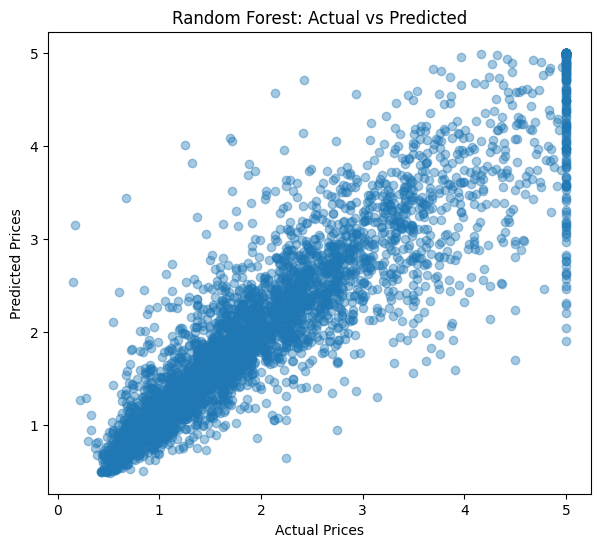

In [27]:
# ========================================
# 6. VISUALIZATION
# ========================================

# ---- Plot: Predicted vs Actual ----
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

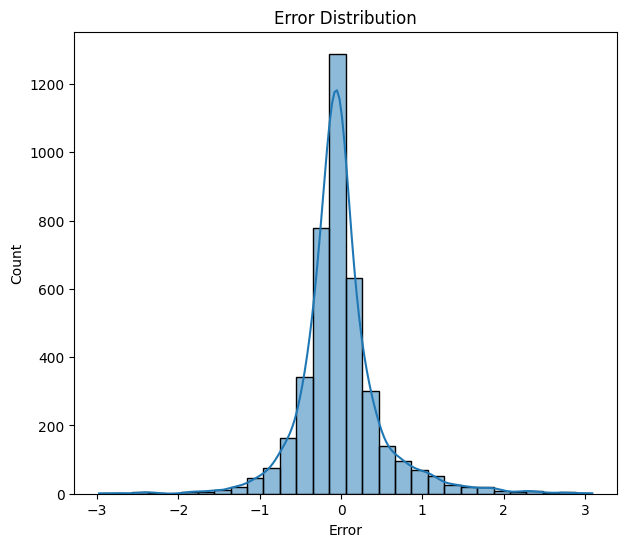

In [25]:
# ---- Plot: Error Distribution ----
errors = y_test - y_pred_rf

plt.figure(figsize=(7, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title("Error Distribution")
plt.xlabel("Error")
plt.show()

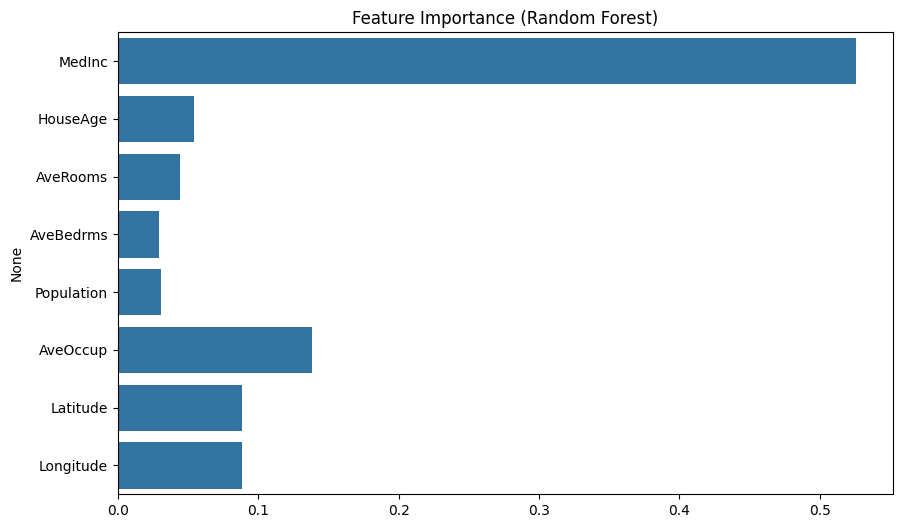

In [26]:
# ---- Feature Importance ----
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()